#  Coding Etiquette & Excel Reporting

###  Importing libraries

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [30]:
path=r'C:\Users\61491\12-2020 Instacart Basket Analysis'

In [31]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','df_merged_final.pkl'))

In [32]:
df_dep = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [33]:

df.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,94891,4,4,5,13,15.0,22199,1,0,Extra-Dry Cava,...,Regular customer,Bobby,Reed,Male,Arkansas,31,9/21/2017,3,married,45435
1,94891,4,4,5,13,15.0,25146,2,0,Original Orange Juice,...,Regular customer,Bobby,Reed,Male,Arkansas,31,9/21/2017,3,married,45435
2,31925,47329,4,3,10,12.0,22199,1,0,Extra-Dry Cava,...,Regular customer,Carl,Bridges,Male,Alabama,49,6/25/2017,0,single,159539
3,31925,47329,4,3,10,12.0,24968,2,1,Sonoma Brut Sparkling Wine,...,Regular customer,Carl,Bridges,Male,Alabama,49,6/25/2017,0,single,159539
4,95113,410,2,1,18,7.0,25146,18,0,Original Orange Juice,...,Frequent customer,Stephanie,Saunders,Female,Alaska,69,3/17/2020,3,married,73977


In [34]:
df.shape

(1047658, 34)

#### 2. PII is present in the merged dataframe as first name and surname of customers. These columns will not be removed as they specify the customers

#### 3.Create a  “Region” column based on the “State” column from your customers data set.

In [35]:
# Creating region lists
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [36]:
# Creating regional flag column

df.loc[df['state'].isin(northeast), 'region']='Northeast'
df.loc[df['state'].isin(midwest), 'region']='Midwest'
df.loc[df['state'].isin(south), 'region']='South'
df.loc[df['state'].isin(west), 'region']='West'

In [37]:
# Checking frequency
df['region'].value_counts(dropna=False)

South        349190
West         268493
Midwest      244381
Northeast    185594
Name: region, dtype: int64

In [38]:
df.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,region
0,94891,4,4,5,13,15.0,22199,1,0,Extra-Dry Cava,...,Bobby,Reed,Male,Arkansas,31,9/21/2017,3,married,45435,South
1,94891,4,4,5,13,15.0,25146,2,0,Original Orange Juice,...,Bobby,Reed,Male,Arkansas,31,9/21/2017,3,married,45435,South
2,31925,47329,4,3,10,12.0,22199,1,0,Extra-Dry Cava,...,Carl,Bridges,Male,Alabama,49,6/25/2017,0,single,159539,South
3,31925,47329,4,3,10,12.0,24968,2,1,Sonoma Brut Sparkling Wine,...,Carl,Bridges,Male,Alabama,49,6/25/2017,0,single,159539,South
4,95113,410,2,1,18,7.0,25146,18,0,Original Orange Juice,...,Stephanie,Saunders,Female,Alaska,69,3/17/2020,3,married,73977,West


In [39]:
# Create a crosstab to look for difference in spending habits between the different U.S. regions 
crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [40]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,8955,235426
Northeast,6238,179356
South,12768,336422
West,9692,258801


The South region has a large number of high spenders as well as low spenders. This corresponds with the number of customers in this region which higher than other regions.

#### 4.Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [41]:
# Create an exclusion flag column
df.loc[df['max_order']>=5, 'activity']='normal'
df.loc[df['max_order']<5, 'activity']='low'

In [42]:
# Check frequency
df['activity'].value_counts(dropna=False)

normal    859791
low       187867
Name: activity, dtype: int64

In [43]:
# Create a dataframe for low-activity customers
df_low=df[df['activity']=='low']

In [44]:
df_low.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
0,94891,4,4,5,13,15.0,22199,1,0,Extra-Dry Cava,...,Reed,Male,Arkansas,31,9/21/2017,3,married,45435,South,low
1,94891,4,4,5,13,15.0,25146,2,0,Original Orange Juice,...,Reed,Male,Arkansas,31,9/21/2017,3,married,45435,South,low
2,31925,47329,4,3,10,12.0,22199,1,0,Extra-Dry Cava,...,Bridges,Male,Alabama,49,6/25/2017,0,single,159539,South,low
3,31925,47329,4,3,10,12.0,24968,2,1,Sonoma Brut Sparkling Wine,...,Bridges,Male,Alabama,49,6/25/2017,0,single,159539,South,low
287,108979,2779,4,2,14,7.0,25146,22,0,Original Orange Juice,...,Johns,Male,New Jersey,55,5/5/2018,3,married,154714,Northeast,low


In [45]:
df_low.shape

(187867, 36)

In [46]:
# Exporting df_low
df_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [47]:
# Creating a dataframe for normal-activity customers
df2=df[df['activity']=='normal']

In [48]:
df2.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
4,95113,410,2,1,18,7.0,25146,18,0,Original Orange Juice,...,Saunders,Female,Alaska,69,3/17/2020,3,married,73977,West,normal
5,95113,410,2,1,18,7.0,16797,7,1,Strawberries,...,Saunders,Female,Alaska,69,3/17/2020,3,married,73977,West,normal
6,103063,410,28,3,16,10.0,16797,2,1,Strawberries,...,Saunders,Female,Alaska,69,3/17/2020,3,married,73977,West,normal
7,95113,410,2,1,18,7.0,47209,9,0,Organic Hass Avocado,...,Saunders,Female,Alaska,69,3/17/2020,3,married,73977,West,normal
8,95113,410,2,1,18,7.0,26604,26,0,Organic Blackberries,...,Saunders,Female,Alaska,69,3/17/2020,3,married,73977,West,normal


In [49]:
df2.shape

(859791, 36)

#### 5.Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [50]:
df2.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'Busiest_day',
       'Busiest_days', 'Slowest_days', 'Busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spender_flag',
       'median_days_since_prior_order', 'frequency_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income', 'region', 'activity'],
      dtype='object')

#### #Age

In [113]:
# Creating age flag column
df2.loc[df2['age']<=25, 'age_group']='Youth'
df2.loc[(df2['age']<65) & (df2['age']>25), 'age_group']='Adult'
df2.loc[df2['age']>65, 'age_group']='Senior'

In [114]:
df2['age_group'].value_counts()

Adult     525139
Senior    227333
Youth     107319
Name: age_group, dtype: int64

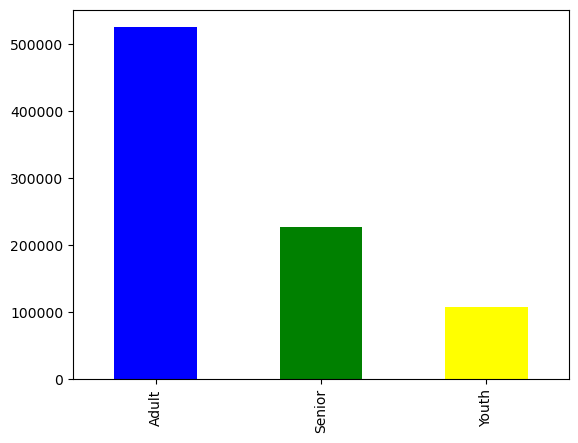

In [115]:
# 6.Age group visualization
bar=df2['age_group'].value_counts().plot.bar(color =['blue', 'green', 'yellow','orange'])

There is a large number of Middle Aged customer than all other age groups. 

In [116]:
# Export Bar Chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

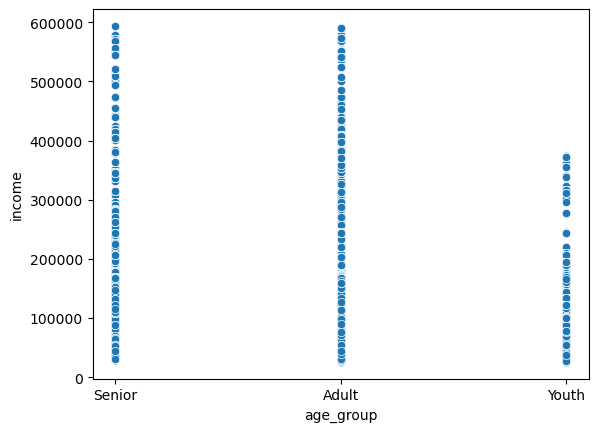

In [117]:
# Connection between age groups and income
scatter = sns.scatterplot(x = 'age_group', y = 'income', data = df2)

Seniors have more income than any other age group

In [118]:
# Export Scatter
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_income_agegroup.png'))

In [119]:
# 7.Aggregate for age group usage frequency
df2.groupby('age_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                   mean  min   max
age_group                                         
Adult                         10.020734  0.0  30.0
Senior                        10.018092  0.0  30.0
Youth                         10.025392  0.0  30.0

In [120]:
# 7.Aggregate for age group expenditure
df2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
Adult      7.783912  1.0  25.0
Senior     7.811183  1.0  25.0
Youth      7.791862  1.0  25.0

#### #Income

In [121]:
# Create income flag column
df2.loc[df2['income']<50000, 'income_group']='low income'
df2.loc[(df2['income']>=50000)&(df2['income']<150000), 'income_group']='middle income'
df2.loc[df2['income']>150000, 'income_group']='high income'

In [60]:
df2['income_group'].value_counts()

middle income    655735
high income      111877
low income        92124
Name: income_group, dtype: int64

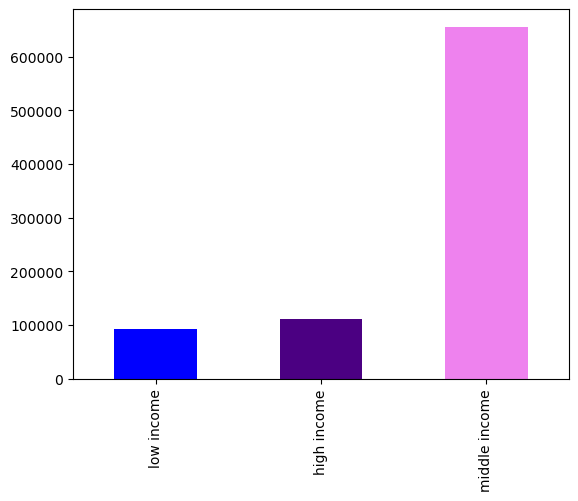

In [61]:
# 6.Income group visualization
bar1 = df2['income_group'].value_counts().sort_values().plot.bar(color =['blue', 'indigo', 'violet'])

The majority of customers are in the middle income group.

In [62]:
# Export Bar Chart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

In [63]:
# 7.Aggregate for income group order frequency
df2.groupby('income_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                       mean  min   max
income_group                                          
high income                        9.850729  0.0  30.0
low income                        10.395912  0.0  30.0
middle income                      9.996509  0.0  30.0

In [64]:
# 7.Aggregate for income group expenditure
df2.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.936246  1.0  25.0
low income     6.700960  1.0  25.0
middle income  7.920811  1.0  25.0

#### #Number of Dependents

In [65]:
# Create a family flag 
df2.loc[df2['no_of_dependants']<1, 'family_group']='No Family'
df2.loc[(df2['no_of_dependants']>=1)&(df2['no_of_dependants']<3), 'family_group']='Small Family'
df2.loc[df2['no_of_dependants']>=3, 'family_group']='Big Family'

C:\Users\61491\AppData\Local\Temp\ipykernel_21276\1580509180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['no_of_dependants']<1, 'family_group']='No Family'


In [66]:
df2['family_group'].value_counts()

Small Family    428147
Big Family      216239
No Family       215405
Name: family_group, dtype: int64

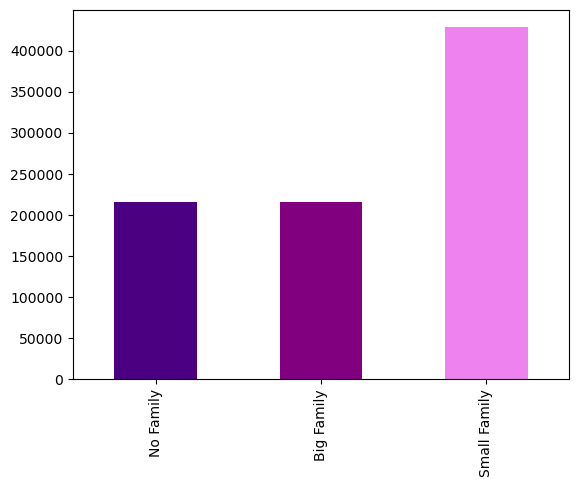

In [67]:
# 6.Family group visualization
bar2 = df2['family_group'].value_counts().sort_values().plot.bar(color =['indigo', 'purple', 'violet'])

Most customers have a small family of 1 to 2 dependents

In [68]:
# Export Bar Chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_group.png'))

In [69]:
# 7.Aggregate for family group order frequency
df2.groupby('family_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                      mean  min   max
family_group                                         
Big Family                       10.016935  0.0  30.0
No Family                        10.018700  0.0  30.0
Small Family                     10.023441  0.0  30.0

In [70]:
# 7.Aggregate for family group expenditure
df2.groupby('family_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
family_group                     
Big Family    7.784121  1.0  25.0
No Family     7.799534  1.0  25.0
Small Family  7.792420  1.0  25.0

#### #Department Id

In [71]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [72]:
df_dep=df_dep.drop(columns=['Unnamed: 0'])

In [73]:
# Data Dictionary for department_id
data_dict = df_dep.to_dict('index')

In [74]:
data_dict

{0: {'department': 'frozen'},
 1: {'department': 'other'},
 2: {'department': 'bakery'},
 3: {'department': 'produce'},
 4: {'department': 'alcohol'},
 5: {'department': 'international'},
 6: {'department': 'beverages'},
 7: {'department': 'pets'},
 8: {'department': 'dry goods pasta'},
 9: {'department': 'bulk'},
 10: {'department': 'personal care'},
 11: {'department': 'meat seafood'},
 12: {'department': 'pantry'},
 13: {'department': 'breakfast'},
 14: {'department': 'canned goods'},
 15: {'department': 'dairy eggs'},
 16: {'department': 'household'},
 17: {'department': 'babies'},
 18: {'department': 'snacks'},
 19: {'department': 'deli'},
 20: {'department': 'missing'}}

In [75]:
# Which departments are most popuplar?
df2['department_id'].value_counts(dropna=False)

4     253757
16    144952
19     77347
7      71614
1      57464
13     48554
3      31338
20     27863
15     27603
9      22048
17     18909
14     18698
12     18534
18     11973
11     11686
6       7087
5       3776
8       2700
21      1897
2       1002
10       989
Name: department_id, dtype: int64

I seems alcohol is the most sought after product for the customers

In [76]:
# Alcoholic Status
result=[]

for value in df2['department_id']:
    if value == 4:
        result.append('Alcoholic')
    else:
        result.append('Non Alcoholic')

In [77]:
result

['Non Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Alcoholic',
 'Non Al

In [78]:
df2['Alcoholic Status']=result

C:\Users\61491\AppData\Local\Temp\ipykernel_21276\2273379259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Alcoholic Status']=result


In [79]:
# Checking Column
df2['Alcoholic Status'].value_counts(dropna=False)

Non Alcoholic    606034
Alcoholic        253757
Name: Alcoholic Status, dtype: int64

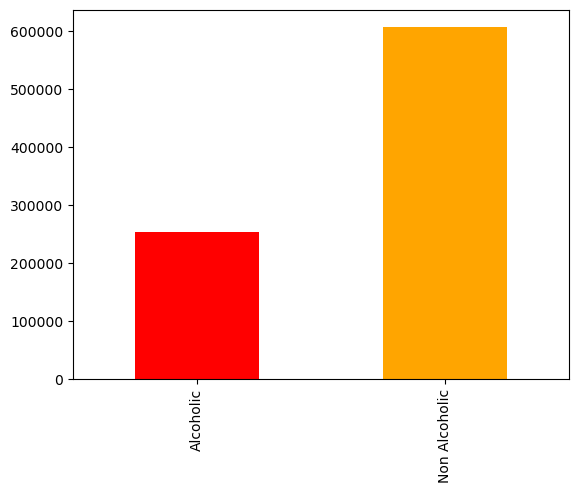

In [80]:
# 6.Family group visualization
bar3 = df2['Alcoholic Status'].value_counts().sort_values().plot.bar(color =['red','orange'])

Of all the customers 606034 are Non Alcoholic while 253757 are Alcoholic        

In [81]:
# Export Bar Chart
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_alcoholic_status.png'))

In [82]:
# 7.Aggregate for family group order frequency
df2.groupby('Alcoholic Status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                          mean  min   max
Alcoholic Status                                         
Alcoholic                             9.796953  0.0  30.0
Non Alcoholic                        10.114268  0.0  30.0

In [83]:
# 7.Aggregate for family group expenditure
df2.groupby('Alcoholic Status').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
Alcoholic Status                     
Alcoholic         7.974872  1.0  15.0
Non Alcoholic     7.715575  1.0  25.0

#### #Compare your customer profiles with regions and departments.

In [122]:
# Creating crosstab for region and age group
age_region = pd.crosstab(df2['region'], df2['age_group'], dropna = False)

In [123]:
age_region

age_group,Adult,Senior,Youth
region,,,
Midwest,124255,50822,24572
Northeast,92746,42039,18698
South,174494,76034,36802
West,133644,58438,27247


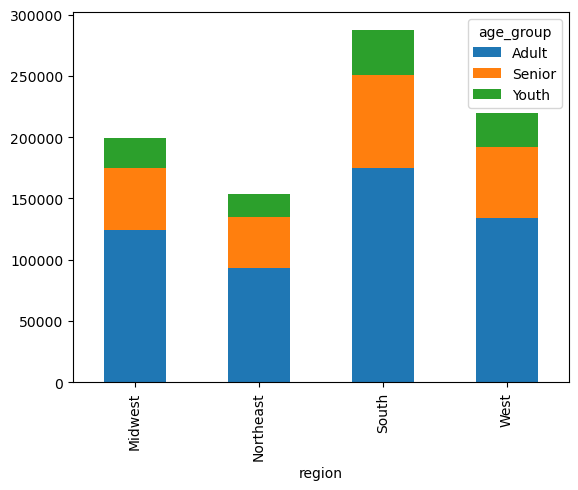

In [124]:
# Age Region Bar Chart
bar4 = age_region.plot(kind='bar',stacked =True)

The South region has the highest customers however in all regions the Senoir customers are the majority followed by adults and finally the Youth

In [125]:
# Export 
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [88]:
# Creating crosstab for region and income
income_region = pd.crosstab(df2['region'], df2['income_group'], dropna = False)

In [89]:
income_region

income_group,high income,low income,middle income
region,,,
Midwest,26181,21225,152204
Northeast,19013,16433,118021
South,37454,31987,217889
West,29229,22479,167621


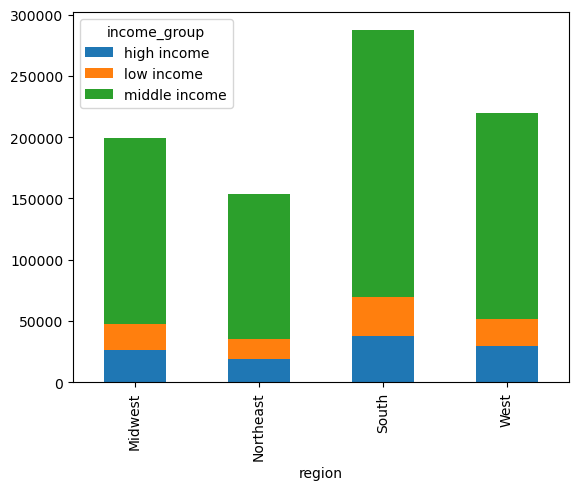

In [90]:
# Income Region Bar Chart
bar5 = income_region.plot(kind='bar',stacked =True)

The middle income group has the highest cutomers in all the regions

In [91]:
# Export 
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [92]:
# Creating crosstab for region and Family
region_family = pd.crosstab(df2['region'], df2['family_group'], dropna = False)

In [93]:
region_family

family_group,Big Family,No Family,Small Family
region,,,
Midwest,48716,50467,100466
Northeast,39222,37695,76566
South,71925,72839,142566
West,56376,54404,108549


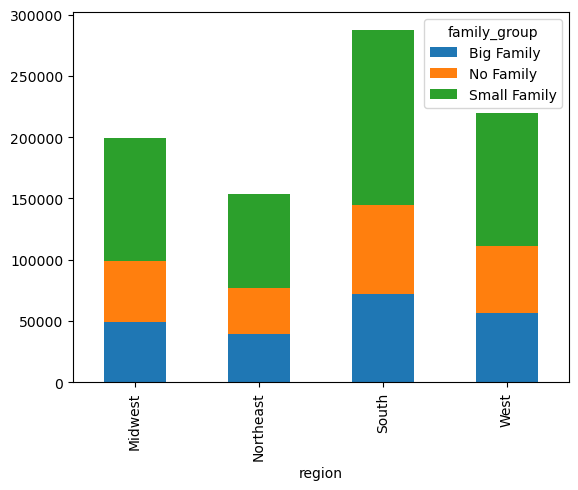

In [94]:
# Family Region Bar Chart
bar6 = region_family.plot(kind='bar',stacked =True)

In all regions most customers have a small family of 1 or 2 dependents

In [95]:
# Export 
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_region.png'))

In [96]:
# Creating crosstab for region and Alcoholic Status
region_alcoholic = pd.crosstab(df2['region'], df2['Alcoholic Status'], dropna = False)

In [97]:
region_alcoholic

Alcoholic Status,Alcoholic,Non Alcoholic
region,,
Midwest,58913,140736
Northeast,45446,108037
South,84875,202455
West,64523,154806


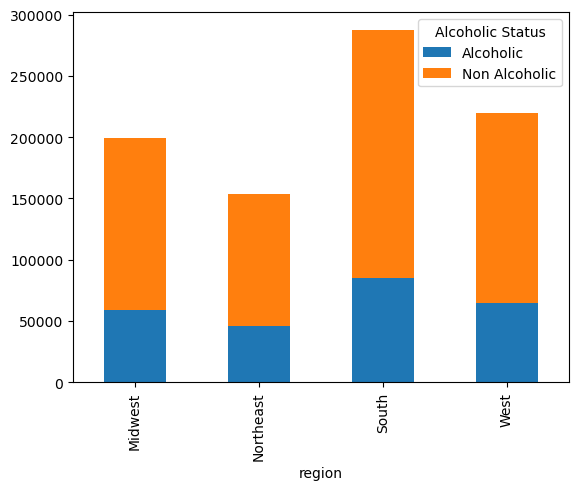

In [98]:
# Alcoholic Region Bar Chart
bar7 = region_alcoholic.plot(kind='bar',stacked =True)

In all regions most customers are non-alcoholic

In [99]:
# Export 
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_alcoholic_region.png'))

In [100]:
# Creating crosstab for region and Customer Loyalty
region_loyalty = pd.crosstab(df2['region'], df2['loyalty_flag'], dropna = False)

In [101]:
region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,45935,49622,104092
Northeast,36932,37407,79144
South,66687,68324,152319
West,53724,52183,113422


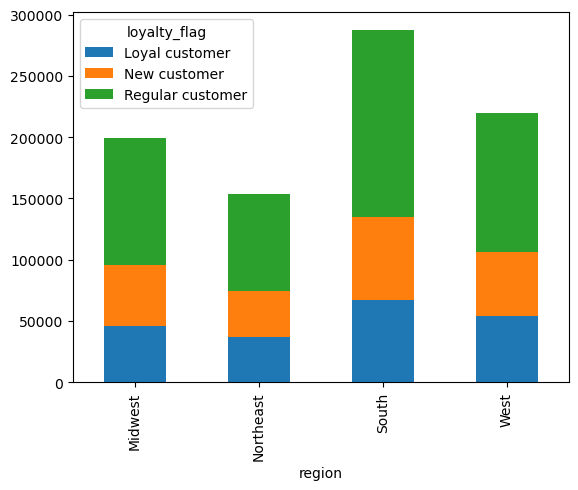

In [103]:
# Loyalty Region Bar Chart
bar8 = region_loyalty.plot(kind='bar',stacked =True)

In all the regions most of the customers are regular

In [104]:
# Export 
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_region.png'))